In [0]:
from math import radians, cos, sin, asin, sqrt
from pyspark.sql import Window
import pyspark.sql.functions as F

In [0]:
data = spark.read.csv('/mnt/datalake/tmp/amani/ride_data/2021_ride',inferSchema=True,header=True)
data=data.withColumn("date",F.to_date("date"))

In [0]:
data.count()

Out[147]: 52511

In [0]:
data.display()

rideid,deviceid,long_start,lat_start,long_end,lat_end,distance_trajet,vitesse_moy,date,type_ride_id
0ec5bd1c-3f4b-47e7-b48c-0da8796cc796_E9C46827-FB69-4255-9B38-FB3CBF8E748E#57607766,E9C46827-FB69-4255-9B38-FB3CBF8E748E#57607766,6.924098432070505,43.5303241387415,6.924099018803727,43.530295430723136,4.768607695827262,0.18380683247441656,2021-01-18,17179871842
50be0c22-3eb0-4f5c-b03e-e635c088cc88_52003e168defc5e5#51677312,52003e168defc5e5#51677312,2.3673199,48.8522249,1.8350453,48.9395037,54.14454288716355,10.460233308813644,2021-04-13,34359740226
5f51933d-14d1-4812-bd16-de26e4460c01_54f78c6410482125#94834413,54f78c6410482125#94834413,3.1151383,44.3767409,3.1352622,44.3960989,2.9304130794236083,31.947148315376886,2021-11-04,34359740606
6f023ae0-92b1-4091-8a79-6f2df1b10cdf_5DE402E1-E193-4C82-B11C-3F0BE5FCF3AF#66418459,5DE402E1-E193-4C82-B11C-3F0BE5FCF3AF#66418459,0.22420146249938838,47.996736979764634,0.22390975947901168,47.99666593376531,0.26592300494527576,0.12402924519635547,2021-11-23,34359740641
73b8b7d1-4da4-4c7a-81c2-9baf3b19cbf5_50aeacaef4330ddf#60724030,50aeacaef4330ddf#60724030,2.1990872,50.7814193,2.6592342,50.749182,39.969180358377855,17.020666805656766,2021-10-14,34359739992
8b15e52f-c55e-4dfa-9584-6f89f3261cf6_A44B56C4-2904-49A8-AC4D-A8170B81BFD6#ANONYMOUSTOKEN3446,A44B56C4-2904-49A8-AC4D-A8170B81BFD6#ANONYMOUSTOKEN3446,5.424785122938097,43.28623630975632,5.376944825693149,43.25448574672332,7.30886191500164,10.472807431446515,2021-12-22,8589936760
9201db2c-5334-40ee-9741-a19450701bc9_BE818F26-4D03-446E-B184-243825A3A692#ANONYMOUSTOKEN3256,BE818F26-4D03-446E-B184-243825A3A692#ANONYMOUSTOKEN3256,3.0357658135532315,48.82220564798144,3.135677213066632,48.82143268977972,18.64259394830201,8.62530968117928,2021-05-29,34359742264
9ef7a7b4-f143-4cbf-a7fe-d572d5f7c13f_68D4E780-C44C-4540-B2AF-D5FC99ACDAD1#ANONYMOUSTOKEN3458,68D4E780-C44C-4540-B2AF-D5FC99ACDAD1#ANONYMOUSTOKEN3458,6.36183336655578,46.05829524048749,6.379491507822853,46.07222153830718,3.445344328641488,0.06730346438778245,2021-10-09,17179870608
a297b9ba-05d1-4f65-a190-0c0826b8eb55_5200e0dec0a9455f#08386142,5200e0dec0a9455f#08386142,5.8958154,44.897554,5.6926592,45.134226,44.67478833057784,18.453530030563922,2021-03-12,8589935826
bbfac2f5-c9b8-4ce3-bd8c-b6cd2a441d9c_4512763e0d87d045#if8cr210,4512763e0d87d045#if8cr210,4.9964487,45.8254674,4.9866193,45.7723006,14.546846435093961,12.396909640019333,2021-10-23,25769804512


In [0]:
def get_month(df):
  df = df.withColumn('month',F.month("date"))
  return df
data_month=get_month(data)
data_month1=data_month.where(F.col("month")==1)

In [0]:
data_freq=data_month1.groupby("deviceid","type_ride_id").count()
data_freq.display()

deviceid,type_ride_id,count
1164101350#75553080,25769804050,10
52000db44bc535b9#08742503,965,1
362FCE1E-5679-4DB9-B351-39BD582D1EBE#sxjeop10,34359739420,1
5210e17fc0a684eb#77775073,1285,1
unknown_1563053406#ANONYMOUSTOKEN2536,25769807011,1
A209G21V0202#48054346,8589936670,2
254a0530f70d7ece#o32js610,8589935052,1
68D4E780-C44C-4540-B2AF-D5FC99ACDAD1#ANONYMOUSTOKEN3458,34359740843,1
A3F898D5-A2BE-4F92-BB7A-D0E0C205B063#hg99lw10,25769805718,19
unknown_1570035989#24639777,25769807038,1


In [0]:
data_freq.select(F.max("count")).show()

+----------+
max(count)|
+----------+
 83|
+----------+

In [0]:
data_freq.select(F.avg("count")).show()

+-----------------+
 avg(count)|
+-----------------+
2.223652453740949|
+-----------------+

In [0]:
df_type_ride= data_freq.withColumn("type", F.when(F.col("count") == "1","exceptionnel")
                                 .when(F.col("count").isin([2,4,5,6,7,8,9,10]) ,"occasionnel")
                                  .otherwise(" irregulier"))

In [0]:
df_type_ride.display()

deviceid,type_ride_id,count,type
1164101350#75553080,25769804050,10,occasionnel
52000db44bc535b9#08742503,965,1,exceptionnel
362FCE1E-5679-4DB9-B351-39BD582D1EBE#sxjeop10,34359739420,1,exceptionnel
5210e17fc0a684eb#77775073,1285,1,exceptionnel
unknown_1563053406#ANONYMOUSTOKEN2536,25769807011,1,exceptionnel
A209G21V0202#48054346,8589936670,2,occasionnel
254a0530f70d7ece#o32js610,8589935052,1,exceptionnel
68D4E780-C44C-4540-B2AF-D5FC99ACDAD1#ANONYMOUSTOKEN3458,34359740843,1,exceptionnel
A3F898D5-A2BE-4F92-BB7A-D0E0C205B063#hg99lw10,25769805718,19,irregulier
unknown_1570035989#24639777,25769807038,1,exceptionnel


In [0]:
df_type_ride.groupby("type").count().display()

type,count
irregulier,179
occasionnel,478
exceptionnel,1829


In [0]:
def get_month(df):
  df = df.withColumn('month',F.month("date"))
  return df 
def get_week_of_year(df):
  df = df.withColumn("Week_of_the_year",F.weekofyear( "date"))
  return df 
def get_quarter(df):
  df=df.withColumn("quarter", F.quarter("date"))
  return df
data2=get_month(data)
data2=get_week_of_year(data2)
data2=get_quarter(data2)

In [0]:
def frequency(df,partition,group):
  windows = Window.partitionBy(partition).orderBy(F.col("date").asc())
  df = (
  df.withColumn('rideid', F.first('rideid').over(windows))
    .withColumn('deviceid', F.first('deviceid').over(windows))
      )
  df2=df.groupBy("type_ride_id","deviceid",group).agg(F.count("type_ride_id").alias('frequence'),F.avg('vitesse_moy').alias('vite ss_moyenne'),F.avg("distance_trajet").alias("distance_moy"))
  return  df2

In [0]:
#Trajet quotidien
partition="quarter"
group="Week_of_the_year"
data3=frequency(data2,partition,group)

In [0]:
data3.display()

type_ride_id,deviceid,Week_of_the_year,frequence,vite ss_moyenne,distance_moy
34359744318,1cd8c04336027ece#33912318,1,1,22.578989293773976,4.402920012999892
34359742734,1cd8c04336027ece#33912318,2,2,0.2978766203053055,2.4012506787376395
34359742415,1cd8c04336027ece#33912318,2,1,13.477122051458991,32.566655650178376
8589937442,1cd8c04336027ece#33912318,2,1,16.802957617792323,23.477734429106043
34359741075,1cd8c04336027ece#33912318,3,1,3.0561384362367328,9.509739283708383
17179869736,1cd8c04336027ece#33912318,3,1,1.877163209184664,3.896937393549469
34359740830,1cd8c04336027ece#33912318,4,8,0.900573195269809,9.08033091374061
34359741681,1cd8c04336027ece#33912318,4,5,3.3332484294290503,16.90526327468792
25769805686,1cd8c04336027ece#33912318,4,1,2.0329777647943756,9.422807821857328
2363,1cd8c04336027ece#33912318,5,1,5.634112778964143,3.902386074502891


In [0]:
#Est-ce qu'un trajet a été effectué plus de 2 fois par semaine sur une fenêtre de 3 mois ? (Trajet quotidien)
data4=data3.withColumn("type1",F.when(F.col("frequence") >2,"quotidien"))
data4.display()

type_ride_id,deviceid,Week_of_the_year,frequence,vite ss_moyenne,distance_moy,type1
25769806302,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,0.1758548344725256,3.395513112232939,null
34359738839,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,6.559728267325357,1.6722367773984632,null
17179872391,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,8.855276494414147,2.0779842274778213,null
1406,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,0.047178523558891794,2.9273677174390005,null
8589935741,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,15,1,10.267158242635347,5.191932430485092,null
1776,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,15,1,2.082990640547907,8.299956320906965,null
25769805823,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,1,10.876306948206055,57.24855063961269,null
558,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,1,0.6667706482715133,0.6697003541580101,null
34359742192,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,1,3.243669883441485,0.2942555576560742,null
25769804164,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,17,1,4.795939747267524,2.494423691736809,null


In [0]:
data_quoti=data4.filter(F.col("type1")=="quotidien")
data_quoti.display()

type_ride_id,deviceid,Week_of_the_year,frequence,vite ss_moyenne,distance_moy,type1
962,unknown#ANONYMOUSTOKEN862,40,4,7.395881955144965,3.4096688856953263,quotidien
34359743541,unknown#ANONYMOUSTOKEN862,46,3,2.143014401571804,0.4779174371415076,quotidien
34359741079,unknown#ANONYMOUSTOKEN862,49,5,8.36938461777849,13.7654407801206,quotidien
8589936142,unknown#ANONYMOUSTOKEN862,49,4,8.20646908784278,8.241426213115265,quotidien
2063,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,13,0.522018288744104,2.5061007550095047,quotidien
25769806596,unknown#ANONYMOUSTOKEN862,40,3,11.224098981104925,5.819826315726709,quotidien
34359738899,unknown#ANONYMOUSTOKEN862,42,5,5.977694101782187,1.8502987755385956,quotidien
17179870121,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,21,5,11.176877800486967,9.977774931459237,quotidien
34359741079,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,22,8,6.550867118686632,14.69291543486075,quotidien
25769803915,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,25,9,2.7559532085526763,14.014200877463256,quotidien


In [0]:
data_quoti.count()

Out[184]: 3049

In [0]:
#Est-ce qu'un trajet a été effectué plus de 2 fois par mois sur une fenêtre de 3 mois ? (Trajet occasionnel)
partition="quarter"
group="month"
data5=frequency(data2,partition,group)
data6=data3.withColumn("type2",F.when(F.col("frequence") >2,"occasionnel"))

In [0]:
data6.display()

type_ride_id,deviceid,Week_of_the_year,frequence,vite ss_moyenne,distance_moy,type2
25769806302,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,0.1758548344725256,3.395513112232939,null
17179872391,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,8.855276494414147,2.0779842274778213,null
34359738839,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,6.559728267325357,1.6722367773984632,null
1406,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,13,1,0.047178523558891794,2.9273677174390005,null
8589935741,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,15,1,10.267158242635347,5.191932430485092,null
1776,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,15,1,2.082990640547907,8.299956320906965,null
25769805823,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,1,10.876306948206055,57.24855063961269,null
558,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,1,0.6667706482715133,0.6697003541580101,null
34359742192,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,1,3.243669883441485,0.2942555576560742,null
25769804164,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,17,1,4.795939747267524,2.494423691736809,null


In [0]:
data_occa=data6.filter(F.col("type2")=="occasionnel")
data_quoti.display()

type_ride_id,deviceid,Week_of_the_year,frequence,vitess_moyenne,distance_moy,type1
962,unknown#ANONYMOUSTOKEN862,40,4,7.395881955144965,3.4096688856953263,quotidien
34359743541,unknown#ANONYMOUSTOKEN862,46,3,2.143014401571804,0.4779174371415076,quotidien
34359741079,unknown#ANONYMOUSTOKEN862,49,5,8.36938461777849,13.7654407801206,quotidien
8589936142,unknown#ANONYMOUSTOKEN862,49,4,8.20646908784278,8.241426213115265,quotidien
2063,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,16,13,0.522018288744104,2.5061007550095047,quotidien
25769806596,unknown#ANONYMOUSTOKEN862,40,3,11.224098981104929,5.819826315726709,quotidien
34359738899,unknown#ANONYMOUSTOKEN862,42,5,5.977694101782187,1.8502987755385956,quotidien
17179870121,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,21,5,11.176877800486967,9.977774931459237,quotidien
34359741079,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,22,8,6.550867118686632,14.69291543486075,quotidien
25769803915,83AA971F-D3C9-47C2-B658-0648C522C861#ANONYMOUSTOKEN2426,25,9,2.7559532085526763,14.014200877463256,quotidien


In [0]:
data_quoti.count()



Out[146]: 3049

In [0]:
#data_occ_quo = (data_quoti.join(data_occa, on= data_quoti.type_ride_id == data_occa.type_ride_id,how = "full"))

In [0]:
data_month1=data.toPandas()
data_month1.head()

Out[37]:

,rideid,deviceid,long_start,lat_start,long_end,lat_end,distance_trajet,vitesse_moy,date,type_ride_id
0,0ec5bd1c-3f4b-47e7-b48c-0da8796cc796_E9C46827-...,E9C46827-FB69-4255-9B38-FB3CBF8E748E#57607766,6.924098,43.530324,6.924099,43.530295,4.768608,0.183807,2021-01-18,17179871842
1,50be0c22-3eb0-4f5c-b03e-e635c088cc88_52003e168...,52003e168defc5e5#51677312,2.367320,48.852225,1.835045,48.939504,54.144543,10.460233,2021-04-13,34359740226
2,5f51933d-14d1-4812-bd16-de26e4460c01_54f78c641...,54f78c6410482125#94834413,3.115138,44.376741,3.135262,44.396099,2.930413,31.947148,2021-11-04,34359740606
3,6f023ae0-92b1-4091-8a79-6f2df1b10cdf_5DE402E1-...,5DE402E1-E193-4C82-B11C-3F0BE5FCF3AF#66418459,0.224201,47.996737,0.223910,47.996666,0.265923,0.124029,2021-11-23,34359740641
4,73b8b7d1-4da4-4c7a-81c2-9baf3b19cbf5_50aeacaef...,50aeacaef4330ddf#60724030,2.199087,50.781419,2.659234,50.749182,39.969180,17.020667,2021-10-14,34359739992


In [0]:
import pandas as pd
data_month1 = data_month1.set_index(['date']) 
data_month1.index = pd.to_datetime(data_month1.index) 
data_month1.head()

Out[38]:

,rideid,deviceid,long_start,lat_start,long_end,lat_end,distance_trajet,vitesse_moy,type_ride_id
date,,,,,,,,,
2021-01-18,0ec5bd1c-3f4b-47e7-b48c-0da8796cc796_E9C46827-...,E9C46827-FB69-4255-9B38-FB3CBF8E748E#57607766,6.924098,43.530324,6.924099,43.530295,4.768608,0.183807,17179871842
2021-04-13,50be0c22-3eb0-4f5c-b03e-e635c088cc88_52003e168...,52003e168defc5e5#51677312,2.367320,48.852225,1.835045,48.939504,54.144543,10.460233,34359740226
2021-11-04,5f51933d-14d1-4812-bd16-de26e4460c01_54f78c641...,54f78c6410482125#94834413,3.115138,44.376741,3.135262,44.396099,2.930413,31.947148,34359740606
2021-11-23,6f023ae0-92b1-4091-8a79-6f2df1b10cdf_5DE402E1-...,5DE402E1-E193-4C82-B11C-3F0BE5FCF3AF#66418459,0.224201,47.996737,0.223910,47.996666,0.265923,0.124029,34359740641
2021-10-14,73b8b7d1-4da4-4c7a-81c2-9baf3b19cbf5_50aeacaef...,50aeacaef4330ddf#60724030,2.199087,50.781419,2.659234,50.749182,39.969180,17.020667,34359739992


In [0]:
data_month1.shape

Out[44]: (52511, 9)

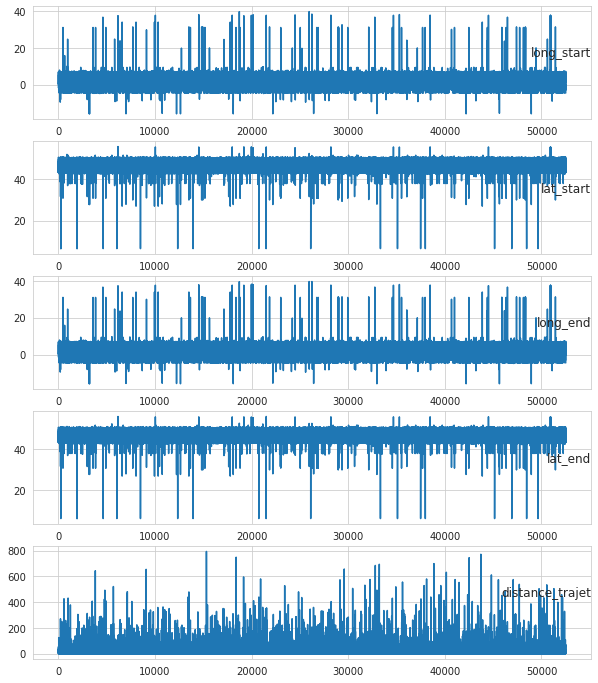

In [0]:
from matplotlib import pyplot
values =data_month1.values
groups = [2, 3,4,5, 6,]
i = 1
# plot each column
pyplot.figure(figsize=(10,12))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data_month1.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [0]:
daily_data['is_weekend'] = daily_data.day_name.isin(["Sunday", "Saturday"])